<a href="https://colab.research.google.com/github/SIDED00R/machinelearning/blob/main/pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]

w=torch.tensor([1.0],requires_grad=True)

def forward(x):
  return x*w
def loss(x,y):
  y_pred=forward(x)
  return (y_pred-y)**2

for epoch in range(10):
  for x_val,y_val in zip(x_data,y_data):
    y_pred=forward(x_val)
    l=loss(x_val,y_val)
    l.backward() # Back propagation to update weights
    print("\tgrad: ",x_val,y_val,w.grad.item())
    w.data=w.data-0.01*w.grad.item()
    w.grad.data.zero_()

  print(f"Epoch: {epoch} l Loss: {l.item()}")
print("Prediction (after training", 4, forward(2).item())

	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.840000152587891
	grad:  3.0 6.0 -16.228801727294922
Epoch: 0 l Loss: 7.315943717956543
	grad:  1.0 2.0 -1.478623867034912
	grad:  2.0 4.0 -5.796205520629883
	grad:  3.0 6.0 -11.998146057128906
Epoch: 1 l Loss: 3.9987640380859375
	grad:  1.0 2.0 -1.0931644439697266
	grad:  2.0 4.0 -4.285204887390137
	grad:  3.0 6.0 -8.870372772216797
Epoch: 2 l Loss: 2.1856532096862793
	grad:  1.0 2.0 -0.8081896305084229
	grad:  2.0 4.0 -3.1681032180786133
	grad:  3.0 6.0 -6.557973861694336
Epoch: 3 l Loss: 1.1946394443511963
	grad:  1.0 2.0 -0.5975041389465332
	grad:  2.0 4.0 -2.3422164916992188
	grad:  3.0 6.0 -4.848389625549316
Epoch: 4 l Loss: 0.6529689431190491
	grad:  1.0 2.0 -0.4417421817779541
	grad:  2.0 4.0 -1.7316293716430664
	grad:  3.0 6.0 -3.58447265625
Epoch: 5 l Loss: 0.35690122842788696
	grad:  1.0 2.0 -0.3265852928161621
	grad:  2.0 4.0 -1.2802143096923828
	grad:  3.0 6.0 -2.650045394897461
Epoch: 6 l Loss: 0.195076122879982
	grad:  1.0 2.0 -0.24

In [ ]:
from torch import nn
import torch
from torch import tensor

x_data=tensor([[1.0],[2.0],[3.0]])
y_data=tensor([[2.0],[4.0],[6.0]])

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
    #(1,1) x->y( y= wx)
    #(2,1) (x1,x2)->y : y=x1*x1 + x2*w2
    #(2, 2) (x1,x2)->(y1, y2)
  def forward(self, x):
    y_pred=self.linear(x)
    return y_pred
  
model=Model()
criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.SGD(model.parameters(), lr= 0.01)

for epoch in range(500):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  print(f'Epoch: {epoch} | Loss: {loss.item()}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step() # w=w-0.01*w.grad().item()

hour_var = tensor([4.0])
y_pred=model(hour_var)
print("Prediction (after training", 4, model(hour_var).item() )


Epoch: 0 | Loss: 47.762786865234375
Epoch: 1 | Loss: 21.411907196044922
Epoch: 2 | Loss: 9.679096221923828
Epoch: 3 | Loss: 4.453868865966797
Epoch: 4 | Loss: 2.1256611347198486
Epoch: 5 | Loss: 1.087154746055603
Epoch: 6 | Loss: 0.6228173971176147
Epoch: 7 | Loss: 0.4141119122505188
Epoch: 8 | Loss: 0.31923481822013855
Epoch: 9 | Loss: 0.27506023645401
Epoch: 10 | Loss: 0.25348442792892456
Epoch: 11 | Loss: 0.24199619889259338
Epoch: 12 | Loss: 0.2350255250930786
Epoch: 13 | Loss: 0.2300931215286255
Epoch: 14 | Loss: 0.22609442472457886
Epoch: 15 | Loss: 0.22253699600696564
Epoch: 16 | Loss: 0.2192014902830124
Epoch: 17 | Loss: 0.21599040925502777
Epoch: 18 | Loss: 0.21285894513130188
Epoch: 19 | Loss: 0.20978763699531555
Epoch: 20 | Loss: 0.20676717162132263
Epoch: 21 | Loss: 0.20379340648651123
Epoch: 22 | Loss: 0.20086337625980377
Epoch: 23 | Loss: 0.19797612726688385
Epoch: 24 | Loss: 0.19513073563575745
Epoch: 25 | Loss: 0.1923263818025589
Epoch: 26 | Loss: 0.18956226110458374
Ep

In [ ]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim


x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=sigmoid(self.linear(x))
    return y_pred
model=Model()

criterion=nn.BCELoss(reduction='mean')
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  print(f'Epoch: {epoch+1} | Loss: {loss.item()}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step() # w=w-0.01*w.grad().item()
#After training
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


Epoch: 1 | Loss: 0.7001646757125854
Epoch: 2 | Loss: 0.6983529925346375
Epoch: 3 | Loss: 0.6966046094894409
Epoch: 4 | Loss: 0.6949169635772705
Epoch: 5 | Loss: 0.6932874917984009
Epoch: 6 | Loss: 0.691713809967041
Epoch: 7 | Loss: 0.6901935935020447
Epoch: 8 | Loss: 0.6887243986129761
Epoch: 9 | Loss: 0.6873043775558472
Epoch: 10 | Loss: 0.6859310865402222
Epoch: 11 | Loss: 0.6846029758453369
Epoch: 12 | Loss: 0.6833178997039795
Epoch: 13 | Loss: 0.6820740103721619
Epoch: 14 | Loss: 0.6808698773384094
Epoch: 15 | Loss: 0.6797034740447998
Epoch: 16 | Loss: 0.6785736083984375
Epoch: 17 | Loss: 0.6774783730506897
Epoch: 18 | Loss: 0.6764166355133057
Epoch: 19 | Loss: 0.6753867268562317
Epoch: 20 | Loss: 0.6743873953819275
Epoch: 21 | Loss: 0.6734175682067871
Epoch: 22 | Loss: 0.6724758744239807
Epoch: 23 | Loss: 0.671561062335968
Epoch: 24 | Loss: 0.6706721186637878
Epoch: 25 | Loss: 0.669808030128479
Epoch: 26 | Loss: 0.6689676642417908
Epoch: 27 | Loss: 0.6681500673294067
Epoch: 28 | L

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def forward(x):
  return x*w
def loss(x,y):
  y_pred=forward(x)
  return (y_pred-y)**2
w=torch.tensor([1.0],requires_grad=True)
l=loss(x=2, y=4)
l.backward()
print(w.grad.data)

tensor([-8.])


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def forward(x):
  return x*x*w2+x*w1+b
def loss(x,y):
  y_pred=forward(x)
  return (y_pred-y)**2
b=torch.tensor([2.0],requires_grad=True)
w1=torch.tensor([1.0],requires_grad=True)
w2=torch.tensor([2.0],requires_grad=True)
l=loss(x=1, y=2)
l.backward()
print(w1.grad.data)

tensor([6.])


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def forward(x):
  return x*x*w2+x*w1+b
def loss(x,y):
  y_pred=forward(x)
  return (y_pred-y)**2
b=torch.tensor([2.0],requires_grad=True)
w1=torch.tensor([1.0],requires_grad=True)
w2=torch.tensor([2.0],requires_grad=True)
l=loss(x=1, y=2)
l.backward()
print(w2.grad.data)

tensor([6.])


Prediction (after training 4 7.974133491516113


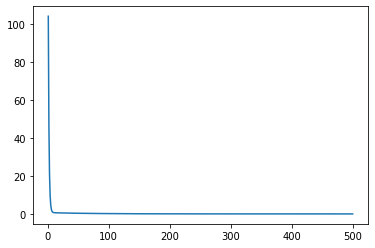

In [3]:
from torch import nn
import torch
from torch import tensor
x_data=tensor([[1.0],[2.0],[3.0]])
y_data=tensor([[2.0],[4.0],[6.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=self.linear(x)
    return y_pred
model=Model()
criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.SGD(model.parameters(), lr= 0.01)
losses=[]
for epoch in range(500):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  losses.append(loss)
  optimizer.step() 
epoch=range(1,501)
hour_var = tensor([4.0])
y_pred=model(hour_var)
print("Prediction (after training", 4, model(hour_var).item() )
plt.plot(epoch,losses)

Prediction (after training 4 -0.31801313161849976


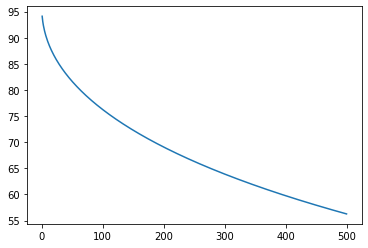

In [ ]:
from torch import nn
import torch
from torch import tensor
x_data=tensor([[1.0],[2.0],[3.0]])
y_data=tensor([[2.0],[4.0],[6.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=self.linear(x)
    return y_pred
model=Model()
criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.Adagrad(model.parameters(), lr= 0.01)
losses=[]
for epoch in range(500):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  losses.append(loss)
  optimizer.step() 
epoch=range(1,501)
hour_var = tensor([4.0])
y_pred=model(hour_var)
print("Prediction (after training", 4, model(hour_var).item() )
plt.plot(epoch,losses)

Prediction (after training 4 7.122629165649414


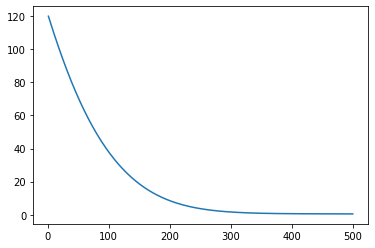

In [ ]:
from torch import nn
import torch
from torch import tensor
x_data=tensor([[1.0],[2.0],[3.0]])
y_data=tensor([[2.0],[4.0],[6.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=self.linear(x)
    return y_pred
model=Model()
criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.Adam(model.parameters(), lr= 0.01)
losses=[]
for epoch in range(500):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  losses.append(loss)
  optimizer.step() 
epoch=range(1,501)
hour_var = tensor([4.0])
y_pred=model(hour_var)
print("Prediction (after training", 4, model(hour_var).item() )
plt.plot(epoch,losses)

Prediction (after training 4 6.636087417602539


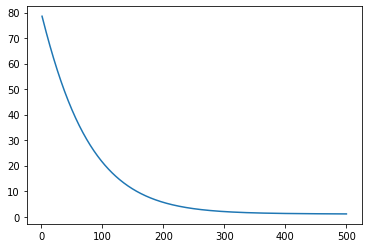

In [ ]:
from torch import nn
import torch
from torch import tensor
x_data=tensor([[1.0],[2.0],[3.0]])
y_data=tensor([[2.0],[4.0],[6.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=self.linear(x)
    return y_pred
model=Model()
criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.Adamax(model.parameters(), lr= 0.01)
losses=[]
for epoch in range(500):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  losses.append(loss)
  optimizer.step() 
epoch=range(1,501)
hour_var = tensor([4.0])
y_pred=model(hour_var)
print("Prediction (after training", 4, model(hour_var).item() )
plt.plot(epoch,losses)

Prediction (after training 4 7.984743595123291


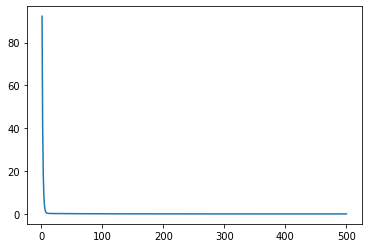

In [ ]:
from torch import nn
import torch
from torch import tensor
x_data=tensor([[1.0],[2.0],[3.0]])
y_data=tensor([[2.0],[4.0],[6.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=self.linear(x)
    return y_pred
model=Model()
criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.ASGD(model.parameters(), lr= 0.01)
losses=[]
for epoch in range(500):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  losses.append(loss)
  optimizer.step() 
epoch=range(1,501)
hour_var = tensor([4.0])
y_pred=model(hour_var)
print("Prediction (after training", 4, model(hour_var).item() )
plt.plot(epoch,losses)

Prediction (after training 4 7.999974250793457


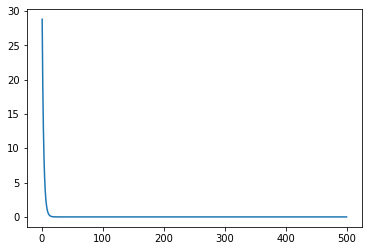

In [ ]:
from torch import nn
import torch
from torch import tensor
x_data=tensor([[1.0],[2.0],[3.0]])
y_data=tensor([[2.0],[4.0],[6.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=self.linear(x)
    return y_pred
model=Model()
criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.LBFGS(model.parameters(), lr= 0.01)
losses=[]
def closure():
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  return loss
for epoch in range(500):
  optimizer.step(closure)
  loss=closure()
  losses.append(loss)
epoch=range(1,501)
hour_var = tensor([4.0])
y_pred=model(hour_var)
print("Prediction (after training", 4, model(hour_var).item() )
plt.plot(epoch,losses)

Prediction (after training 4 7.999117851257324


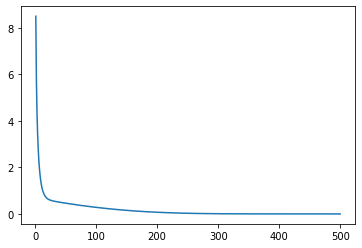

In [ ]:
from torch import nn
import torch
from torch import tensor
x_data=tensor([[1.0],[2.0],[3.0]])
y_data=tensor([[2.0],[4.0],[6.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=self.linear(x)
    return y_pred
model=Model()
criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.RMSprop(model.parameters(), lr= 0.01)
losses=[]
for epoch in range(500):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  losses.append(loss)
  optimizer.step() 
epoch=range(1,501)
hour_var = tensor([4.0])
y_pred=model(hour_var)
print("Prediction (after training", 4, model(hour_var).item() )
plt.plot(epoch,losses)

Prediction (after training 4 7.999993324279785


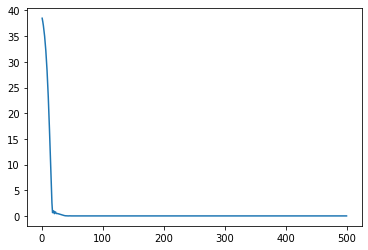

In [ ]:
from torch import nn
import torch
from torch import tensor
x_data=tensor([[1.0],[2.0],[3.0]])
y_data=tensor([[2.0],[4.0],[6.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=self.linear(x)
    return y_pred
model=Model()
criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.Rprop(model.parameters(), lr= 0.01)
losses=[]
for epoch in range(500):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  losses.append(loss)
  optimizer.step() 
epoch=range(1,501)
hour_var = tensor([4.0])
y_pred=model(hour_var)
print("Prediction (after training", 4, model(hour_var).item() )
plt.plot(epoch,losses)

In [ ]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim
x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=sigmoid(self.linear(x))
    return y_pred
model=Model()
criterion=nn.BCELoss(reduction='mean')
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
print(loss.item())
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


0.4814285337924957
Prediction after 1 hour of training: 0.4107 | Above 50%: False
Prediction after 7 hour of training: 0.9606 | Above 50%: True
Prediction after 20 hour of training: 1.0000 | Above 50%: True


In [ ]:
from torch import tensor
from torch import nn
from torch import relu
import torch.nn.functional as F
import torch.optim as optim
x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=relu(self.linear(x))
    return y_pred
model=Model()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
print(loss.item())
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


0.042622651904821396
Prediction after 1 hour of training: 0.0000 | Above 50%: False
Prediction after 7 hour of training: 2.5055 | Above 50%: True
Prediction after 20 hour of training: 8.4541 | Above 50%: True


In [ ]:
from torch import tensor
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
relu6=nn.ReLU6()
x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=relu6(self.linear(x))
    return y_pred
model=Model()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
print(loss.item())
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


0.04720795527100563
Prediction after 1 hour of training: 0.0000 | Above 50%: False
Prediction after 7 hour of training: 2.2787 | Above 50%: True
Prediction after 20 hour of training: 6.0000 | Above 50%: True


In [ ]:
from torch import tensor
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
elu=nn.ELU()
x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=elu(self.linear(x))
    return y_pred
model=Model()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
print(loss.item())
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


0.049808576703071594
Prediction after 1 hour of training: -0.0909 | Above 50%: False
Prediction after 7 hour of training: 2.2855 | Above 50%: True
Prediction after 20 hour of training: 7.4439 | Above 50%: True


In [ ]:
from torch import tensor
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
selu=nn.SELU()
x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=selu(self.linear(x))
    return y_pred
model=Model()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
print(loss.item())
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


0.05194928124547005
Prediction after 1 hour of training: -0.0690 | Above 50%: False
Prediction after 7 hour of training: 2.2038 | Above 50%: True
Prediction after 20 hour of training: 7.0698 | Above 50%: True


In [ ]:
from torch import tensor
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
prelu=nn.PReLU()
x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=prelu(self.linear(x))
    return y_pred
model=Model()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
print(loss.item())
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


0.043432656675577164
Prediction after 1 hour of training: -0.0839 | Above 50%: False
Prediction after 7 hour of training: 2.6780 | Above 50%: True
Prediction after 20 hour of training: 9.2072 | Above 50%: True


In [ ]:
from torch import tensor
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
leakyrelu=nn.LeakyReLU()
x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=leakyrelu(self.linear(x))
    return y_pred
model=Model()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
print(loss.item())
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


0.5190020203590393
Prediction after 1 hour of training: -0.0076 | Above 50%: False
Prediction after 7 hour of training: -0.0344 | Above 50%: False
Prediction after 20 hour of training: -0.0926 | Above 50%: False


In [ ]:
from torch import tensor
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
threshold=nn.Threshold(0.001,0.5)
x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=threshold(self.linear(x))
    return y_pred
model=Model()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
print(loss.item())
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


0.11054679751396179
Prediction after 1 hour of training: 0.5000 | Above 50%: False
Prediction after 7 hour of training: 2.2504 | Above 50%: True
Prediction after 20 hour of training: 7.3259 | Above 50%: True


In [ ]:
from torch import tensor
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
hardtanh=nn.Hardtanh()
x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=hardtanh(self.linear(x))
    return y_pred
model=Model()
criterion=nn.BCEWithLogitsLoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
print(loss.item())
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


0.47037845849990845
Prediction after 1 hour of training: -0.6314 | Above 50%: False
Prediction after 7 hour of training: 1.0000 | Above 50%: True
Prediction after 20 hour of training: 1.0000 | Above 50%: True


In [ ]:
from torch import tensor
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
tanh=nn.Tanh()
x_data=tensor([[1.0],[2.0],[3.0], [4.0]])
y_data=tensor([[0.0],[0.0],[1.0], [1.0]])
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  def forward(self, x):
    y_pred=tanh(self.linear(x))
    return y_pred
model=Model()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
for epoch in range(1000):
  y_pred=model(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
print(loss.item())
hour_var=model(tensor([1.0]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([7.0]))
print(f'Prediction after 7 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')
hour_var=model(tensor([20.0]))
print(f'Prediction after 20 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() >0.5}')


0.06633114814758301
Prediction after 1 hour of training: -0.0393 | Above 50%: False
Prediction after 7 hour of training: 0.9891 | Above 50%: True
Prediction after 20 hour of training: 1.0000 | Above 50%: True
